# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv('/content/books_clustered.csv')
df.head()

,bookID,Title,Authors,Average Rating,isbn,isbn13,Language Code,Number Pages,Ratings Count,Text Reviews Count,Publication Date,Publisher,Authors_Freq,Publisher_Freq,Cluster
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652.0,2095690.0,27591.0,2006-09-16,Scholastic Inc.,6,13,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870.0,2153167.0,29221.0,2004-09-01,Scholastic Inc.,6,13,0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352.0,6333.0,244.0,2003-11-01,Scholastic,11,33,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435.0,2339585.0,36325.0,2004-05-01,Scholastic Inc.,6,13,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690.0,41428.0,164.0,2004-09-13,Scholastic,6,33,0


In [ ]:
col_num = ['Average Rating', 'Number Pages', 'Ratings Count', 'Text Reviews Count']
col_cat = ['Authors', 'Language Code', 'Publisher']

Data Preprocessing

In [ ]:
scaler = RobustScaler()
df[col_num] = scaler.fit_transform(df[col_num])

In [ ]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[col_num] = qt.fit_transform(df[col_num])

In [ ]:
label_encoder = LabelEncoder()
df['Language Code'] = label_encoder.fit_transform(df['Language Code'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
feature = [
    'Publisher_Freq', 'Ratings Count', 'Number Pages', 'Average Rating', 'Language Code', 'Text Reviews Count',
    'Authors_Freq'
]

target = 'Cluster'

x = df[feature]
y = df[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
all_metrics = {}
all_predictions = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Simpan prediksi untuk visualisasi nanti
    all_predictions[name] = y_pred

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    all_metrics[name] = {
        "Accuracy": round(accuracy, 4),
        "F1-Score": round(f1, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4)
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [ ]:
metrics_df = pd.DataFrame(all_metrics).T
print(metrics_df)

                     Accuracy  F1-Score  Precision  Recall
Logistic Regression    0.9897    0.9845     0.9813  0.9877
Decision Tree          1.0000    1.0000     1.0000  1.0000
Random Forest          1.0000    1.0000     1.0000  1.0000
SVM                    1.0000    1.0000     1.0000  1.0000
KNN                    1.0000    1.0000     1.0000  1.0000


- Logistic Regression memiliki performa sangat tinggi, dengan akurasi hampir 99% dan F1-Score di atas 98%.

- Decision Tree, Random Forest, SVM, dan KNN semuanya mencapai skor sempurna (100%) di keempat metrik

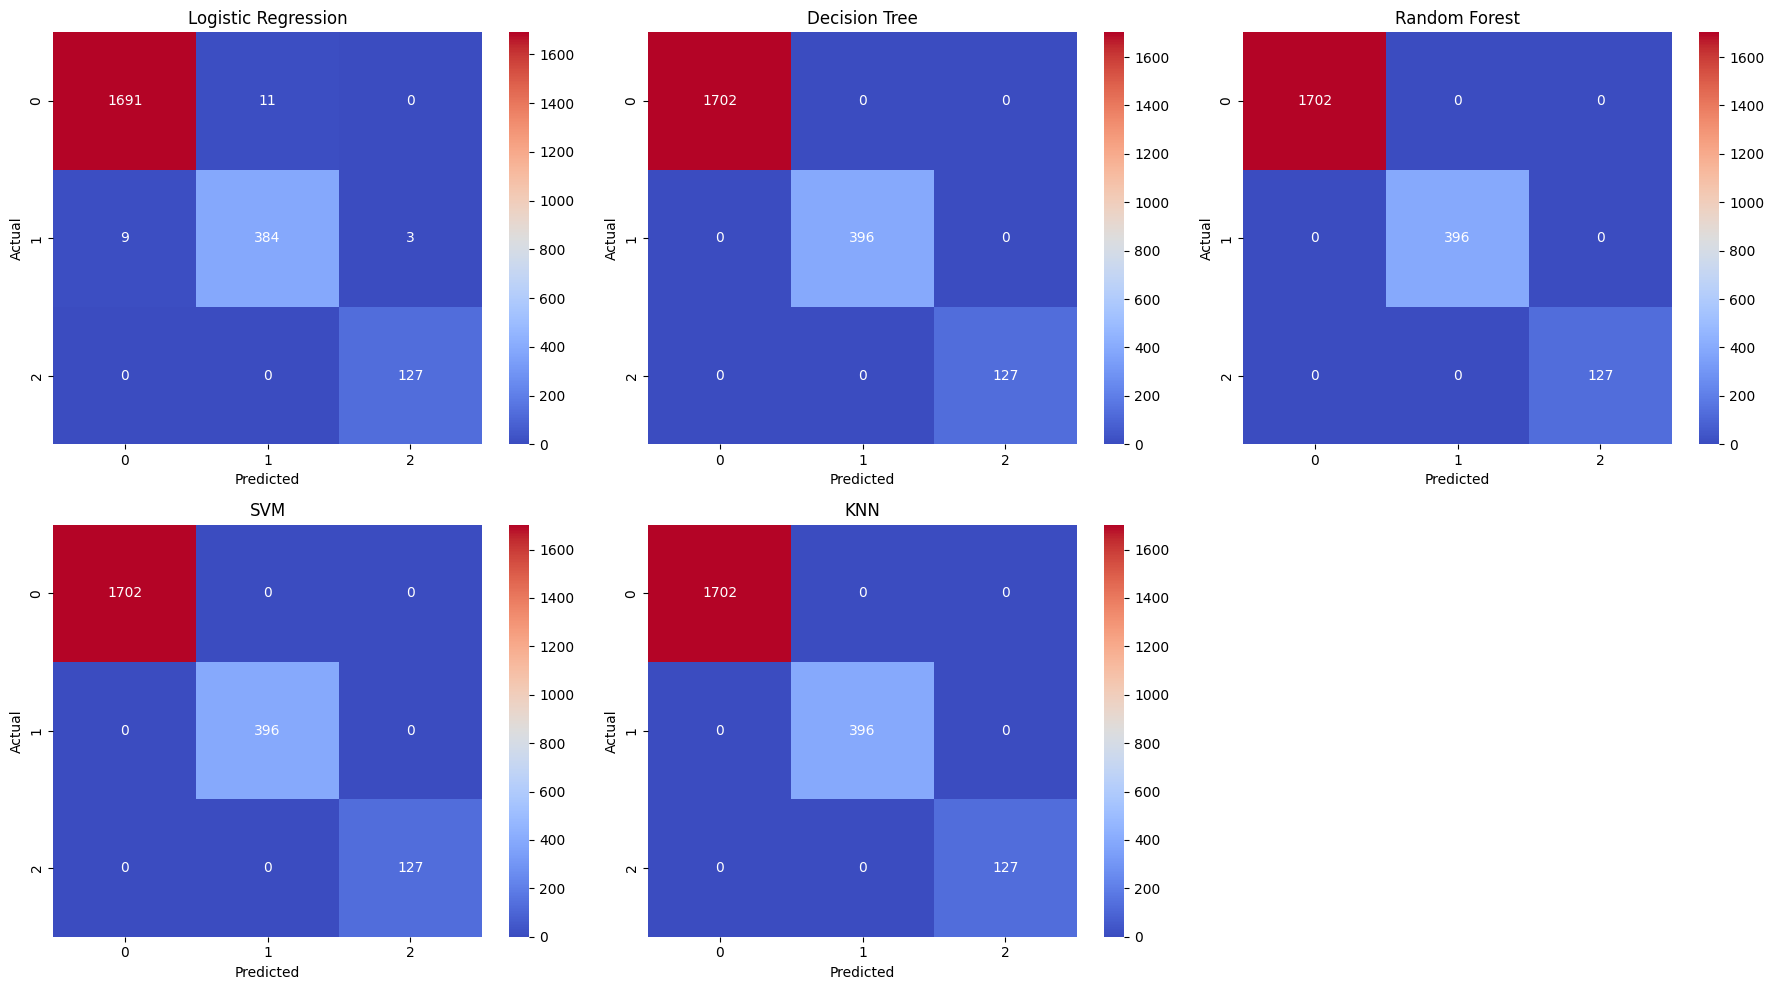

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (model_name, y_pred) in enumerate(all_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Matikan axis sisa jika jumlah model kurang dari 6
for i in range(len(all_predictions), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Semua model menunjukkan performa yang sangat tinggi dalam membedakan ketiga cluster (cluster 0, 1, 2).

- Decision Tree, Random Forest, SVM, dan KNN menunjukkan akurasi sempurna (100%) karena tidak ada kesalahan prediksi sama sekali.

- Logistic Regression masih sangat bagus, tetapi terlihat sedikit meleset:
 - 11 data dari cluster 0 salah ke cluster 1
 - 9 data dari cluster 1 salah ke cluster 0
 - 3 data dari cluster 1 salah ke cluster 2

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Bandingkan Hasil
- Dalam proyek ini, tuning model belum dilakukan karena sebagian besar model (Decision Tree, Random Forest, SVM, KNN) telah menunjukkan hasil sempurna (100%) tanpa perlu penyesuaian lebih lanjut. <br>
- Logistic Regression, walaupun belum dituning, telah mencapai performa tinggi (Accuracy 98.97%, F1-Score 98.45%).

2. Kelemahan Model
- Logistic Regression menunjukkan sedikit kelemahan dibandingkan model lainnya
- Karena Decision Tree, Random Forest, SVM, dan KNN memberikan skor sempurna, ada kemungkinan model mengalami overfitting terhadap dataset saat ini (terutama jika cluster sangat jelas dan data bersih).

3. Rekomedasi Tindakan Lanjutan
- Validasi Silang (Cross-validation): Untuk menguji apakah model tetap stabil pada subset data yang berbeda.
- Uji dengan Data Baru: Pastikan performa tetap tinggi pada data di luar data training/testing.